In [56]:
import pandas as pd
import numpy as np

file='ENT_CA_DM_Diagnoses.txt'

df=pd.read_csv(file,delimiter='|')

print (df.columns)
cols=['MRN','ENC_DATE','ICD_Dx','ICD_Diagnosis','DX_RANK']
df=df[cols]
df['ENC_DATE']=df['ENC_DATE'].apply(lambda s:s.split(' ')[0])
df=df[df['ENC_DATE']>'1995']
print (df)

Index(['MRN', 'BILL_NUM', 'HAR', 'HAR_MASTER', 'ENC_DATE', 'ADM_DATE',
       'DISC_DATE', 'ICD_Dx', 'ICD_Diagnosis', 'POA', 'DX_RANK', 'ICD_TYPE'],
      dtype='object')
            MRN    ENC_DATE  ICD_Dx  \
0        218087  2011-05-17   161.1   
1        218087  2011-08-22   161.9   
2        218087  2012-09-24   161.9   
3        218087  2014-04-07   477.9   
4        218087  2014-04-07  530.81   
...         ...         ...     ...   
319100  3930091  2020-02-18  Z85819   
319101  3936416  2020-02-07     R51   
319102  3938435  2020-02-18    C029   
319103  3938622  2020-02-18    C321   
319104  3939715  2020-02-19    C300   

                                          ICD_Diagnosis  DX_RANK  
0                    MALIGNANT NEOPLASM OF SUPRAGLOTTIS        2  
1              MALIGNANT NEOPLASM OF LARYNX UNSPECIFIED        1  
2              MALIGNANT NEOPLASM OF LARYNX UNSPECIFIED        1  
3                   ALLERGIC RHINITIS CAUSE UNSPECIFIED        1  
4                        

In [57]:
import re
# def isCancerRelated(diag):
#     try:
#         pattern=r'NEOPLASM|TUMOR|CANCER'
#         search=re.search(pattern,diag)
#         if search:
#             return True
#         else:
#             return False
#     except:
#         return False
def isCancerRelated(code):
    flag=False
    if code[0]=='C':
        flag=True
    if code[0]=='1':
        flag=True
    return flag
mask=df['ICD_Dx'].apply(isCancerRelated)
df=df[mask]
print(df['ICD_Diagnosis'].value_counts())

MALIGNANT NEOPLASM OF HEAD FACE AND NECK                    39169
MALIGNANT NEOPLASM OF BASE OF TONGUE                        12001
MALIGNANT NEOPLASM OF THYROID GLAND                         10152
MALIGNANT NEOPLASM OF TONSIL                                 7612
MALIGNANT NEOPLASM OF SUPRAGLOTTIS                           5711
                                                            ...  
MALIGNANT NEOPLASM OF NIPPLE AND AREOLA OF FEMALE BREAST        1
FOLLICULAR LYMPHOMA GRADE IIIA, UNSPECIFIED SITE                1
MALIGNANT MELANOMA OF NOSE                                      1
MALIGNANT NEOPLASM OF AXILLARY TAIL OF FEMALE BREAST            1
NODULAR SCLER CLASS HODGKIN LYMPHOMA UNSP SITE                  1
Name: ICD_Diagnosis, Length: 592, dtype: int64


number of patients: 2541


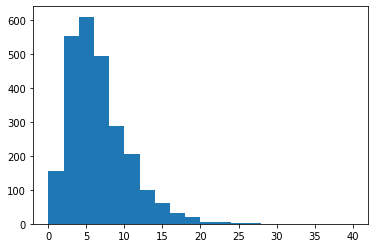

         MRN    ENC_DATE ICD_Dx  \
3032  296701  2002-03-13    185   
3326  296701  2011-07-07  143.9   
2887  296701  2011-07-15  195.0   
16    296701  2011-07-19  141.1   
2888  296701  2011-07-19  145.0   
2391  296701  2011-07-28  145.2   
2235  296701  2012-04-18  145.5   
2545  296701  2012-09-27  145.9   
1996  296701  2012-12-18  143.0   

                                       ICD_Diagnosis  DX_RANK  
3032                  MALIGNANT NEOPLASM OF PROSTATE        2  
3326           MALIGNANT NEOPLASM OF GUM UNSPECIFIED        2  
2887        MALIGNANT NEOPLASM OF HEAD FACE AND NECK        1  
16    MALIGNANT NEOPLASM OF DORSAL SURFACE OF TONGUE        2  
2888              MALIGNANT NEOPLASM OF CHEEK MUCOSA        1  
2391               MALIGNANT NEOPLASM OF HARD PALATE        1  
2235        MALIGNANT NEOPLASM OF PALATE UNSPECIFIED        1  
2545         MALIGNANT NEOPLASM OF MOUTH UNSPECIFIED        2  
1996                 MALIGNANT NEOPLASM OF UPPER GUM        1  


In [58]:
import matplotlib.pyplot as plt
mrns=df.MRN.unique()
ptx_info=[]
for mrn in mrns:
    sub_df=df[df['MRN']==mrn]
    ptx_info.append(sub_df)
print ('number of patients:',len(ptx_info))
for index,ptx in enumerate(ptx_info):
    ptx_info[index]=ptx_info[index].sort_values('ENC_DATE')
    ptx_info[index]=ptx_info[index].drop_duplicates(subset=['ICD_Diagnosis'],keep='first')
counts=[]
for ptx in ptx_info:
    counts.append(ptx.shape[0])
plt.hist(counts,bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
plt.show()
print (ptx_info[3])

In [61]:
data=[]
for index,ptx in enumerate(ptx_info):
    ### want to get primary diagnoses, date of first primary, secondary diagnoses
    keep_looking=True
    mrn=ptx.iloc[0]['MRN']
    date_of_primary_diagnosis=''
    primary_diagnoses=''
    secondary_diagnoses=''
    for i,row in ptx.iterrows():
        if keep_looking and row['DX_RANK']==1:
            primary_diagnoses=primary_diagnoses+row['ENC_DATE']+': '+row['ICD_Diagnosis']+'|'
            date_of_primary_diagnosis=row['ENC_DATE']
            keep_looking=False
        elif row['DX_RANK']==1:
            primary_diagnoses=primary_diagnoses+row['ENC_DATE']+': '+row['ICD_Diagnosis']+'|'
        elif row['DX_RANK']==2:
            secondary_diagnoses=secondary_diagnoses+row['ENC_DATE']+': '+row['ICD_Diagnosis']+'|'
    datum=[mrn,date_of_primary_diagnosis,primary_diagnoses,secondary_diagnoses]
    data.append(datum)
df_export=pd.DataFrame(data=data,columns=['mrn','date_of_primary_diagnosis','primary_diagnoses','secondary_diagnoses'])
print(df_export.head())
df_export.to_csv('RM_Diagnoses.csv',index=False)

      mrn date_of_primary_diagnosis  \
0  218087                2011-03-15   
1  218644                2010-11-03   
2  255332                2004-06-10   
3  296701                2011-07-15   
4  475506                2013-06-11   

                                   primary_diagnoses  \
0  2011-03-15: MALIGNANT NEOPLASM OF GLOTTIS|2011...   
1  2010-11-03: MALIGNANT NEOPLASM OF LARYNX UNSPE...   
2  2004-06-10: MALIGNANT NEOPLASM OF THYROID GLAN...   
3  2011-07-15: MALIGNANT NEOPLASM OF HEAD FACE AN...   
4  2013-06-11: MALIGNANT NEOPLASM OF BASE OF TONG...   

                                 secondary_diagnoses  
0  2011-03-15: MALIGNANT NEOPLASM OF LARYNX UNSPE...  
1    2010-11-17: MALIGNANT NEOPLASM OF SUPRAGLOTTIS|  
2  2008-08-29: SECONDARY MALIGNANT NEOPLASM OF ME...  
3  2002-03-13: MALIGNANT NEOPLASM OF PROSTATE|201...  
4  2013-06-11: SECONDARY AND UNSPECIFIED MALIGNAN...  
